# What is linear regression?

Regression is a method of modelling a target value based on independant predictors. This method is motsly used for forecasting and finding out cause and effect relationship between variables. Regression techniques mostly differ based on the number of independent variables and the type of relationship between independant and dependent variables.


Simple linear regresion is a type of regession analysis where the number of independent variables is one and there is a linear relationship between the independant (x) and dependent (y) variable. Bsed on the given data points, we try to plot a line that models the points the best. The line can be modelled based on the linear equation shown below.

$$ y = ax + b$$

The motive of linear regression algorithm is to find the best values for $a$ and $b$. Before moving on to the algorithm, let's have a look at two important concepts you must know to better understand linear regression.

## Cost Function

The cost functin helps us to figure out the best possible values for $a$ and $b$ which would provide the best fit line for the data points. Since we want the best values for $a$ and $b$, we convert this search problem into a minimization problem where we would like to minimize the error between the predicted value and the actual value.

$$minimize\frac{1}{n}\sum_{i=1}^{n}(pred_i - y_i)^2$$


$$J = \frac{1}{n}\sum_{i=1}^{n}(pred_i - y_i)^2$$

we choose the above function to minimize. The difference between the predicted values and groud truth measures the error difference. We square the error difference and sum over all data points and divide that value by the total number of data points. This provides the **average squarred error** over all the data points. Therefore, this cost function is also known as the **Mean Squared Error (MSE)** function. Now, using this MSE function we are going to change the values of $a$ and $b$ such that the MSE value settles at the minima.

## Gradient Descent

The next important concept needed to understand linear regression is **gradient descent**. Gradient descent is a method of update $a$ and $b$ to reduce the cost function (MSE). The idea is that we start with some values for $a$ and $b$ and then we change these values iteratively to reduce the cost. Gradient descent helps us on how to change the values.

<img src="img/gradient.png">


If you decide to tak eon step at a time you would eventually reach the bottom of the pit but this would take a longer time. If you choose to take longer steps each time, you would reach sooner but, there is a chance that you could overshoot the bottom of the pit and not exactly at the bottom. In the gradient descent algorithm, the number of steps you take is **the learning rate**. This decided on how fast the algorithm converges to the minima.


Sometimes the cost function can be a non-convex function where you could settle at a local minima but for linear regression it is always a convex function.

In [31]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/Advertising.csv')
df1 = df[['radio', 'sales']]
df1

,radio,sales
0,37.8,22.1
1,39.3,10.4
2,45.9,9.3
3,41.3,18.5
4,10.8,12.9
...,...,...
195,3.7,7.6
196,4.9,9.7
197,9.3,12.8
198,42.0,25.5


In [32]:
from sklearn.model_selection import train_test_split

X = df1[['radio']]
y = df1[['sales']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

clf = LinearRegression(normalize=True)
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Wow that's pretty low, let's look if there is a correlation between them.

In [34]:
df1.corr()

,radio,sales
radio,1.000000,0.576223
sales,0.576223,1.000000


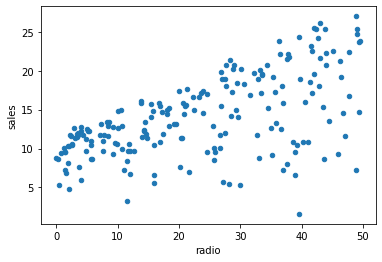

In [35]:
df1.plot.scatter(x='radio', y='sales')

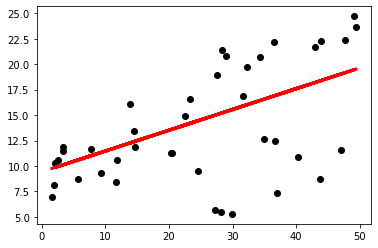

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

y_pred = clf.predict(X_test)
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='red', linewidth=3)